#### 1.0 Set Up

In [54]:
# pytorch
import torch
from torch import nn

# machine learning
import pandas as pd
import numpy as np

# scikit-learn (dataset)
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# file
from pathlib import Path
import requests

# visualization
import matplotlib.pyplot as plt

# device
device = "cpu"

# print(torch.__version__)
# print(np.__version__)

#### 2.0 Raw Data Visualization

In [55]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=12)

# print(X[:5])
# print(y[:5])

"""
#1 visualization: table
"""
circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})

# print(circles.head())

"""
#2 visualization: scatter plot
"""
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

'\n#2 visualization: scatter plot\n'

#### 3.0 Convert Data to Tensors

In [56]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#### 4.0 Split Data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=12)

# print(X_train[:5], y_train[:5])

#### 5.0 Build Non-linear Model

In [58]:
"""
linear1 - relu - linear2 - relu - linear3
"""
class CircleModelV1(nn.Module):
    # constructor
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()
    
    # forward pass
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    

model_1 = CircleModelV1().to(device)
# print(model_1)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

"""
Loss Function -> BCEWithLogitsLoss
Binary Problems:
- spam or not spam
- credit cards = fraud or not fraud
"""

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100

    return acc

#### 5.1 Train and Test

In [59]:
torch.manual_seed(12)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1.forward(X_train).squeeze() # raw, not normalized
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    optimizer.zero_grad() # initialize gradients
    loss.backward() # backward propagation
    optimizer.step() # gradient descent (update parameters)

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1.forward(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss: .4f}, Acc: {acc: .2f}% | Test Loss: {test_loss: .4f}, Test Acc: {test_acc: .2f}%")


Epoch: 0 | Loss:  0.6970, Acc:  49.88% | Test Loss:  0.6938, Test Acc:  50.50%
Epoch: 100 | Loss:  0.6904, Acc:  50.12% | Test Loss:  0.6904, Test Acc:  49.50%
Epoch: 200 | Loss:  0.6868, Acc:  56.38% | Test Loss:  0.6881, Test Acc:  53.50%
Epoch: 300 | Loss:  0.6818, Acc:  60.50% | Test Loss:  0.6849, Test Acc:  56.00%
Epoch: 400 | Loss:  0.6744, Acc:  62.38% | Test Loss:  0.6795, Test Acc:  57.50%
Epoch: 500 | Loss:  0.6622, Acc:  67.25% | Test Loss:  0.6698, Test Acc:  63.00%
Epoch: 600 | Loss:  0.6400, Acc:  74.62% | Test Loss:  0.6489, Test Acc:  67.50%
Epoch: 700 | Loss:  0.6010, Acc:  81.75% | Test Loss:  0.6100, Test Acc:  77.00%
Epoch: 800 | Loss:  0.5329, Acc:  89.38% | Test Loss:  0.5414, Test Acc:  90.00%
Epoch: 900 | Loss:  0.4344, Acc:  93.38% | Test Loss:  0.4417, Test Acc:  94.00%


#### 5.2 Visualize Train and Test Results

helper_functions.py already exists, skipping download


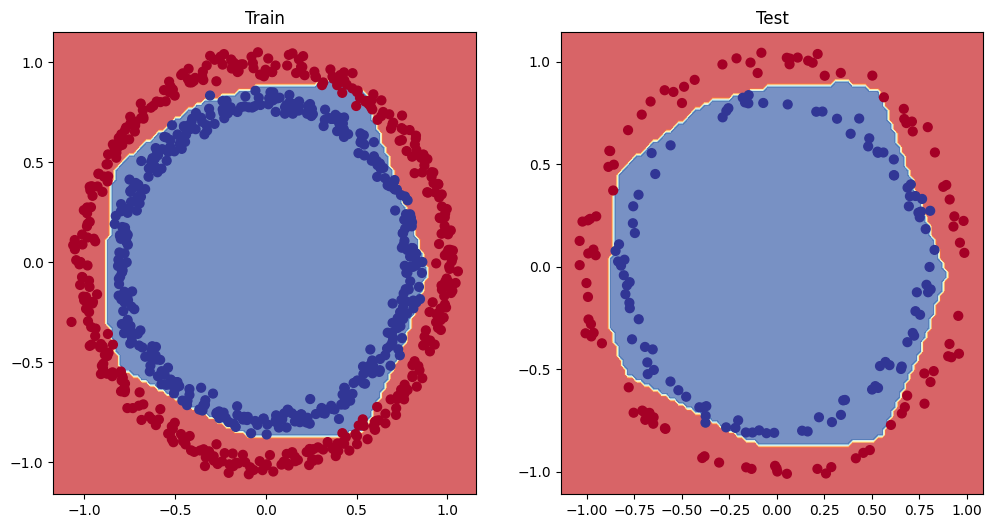

In [60]:
# download helper functions from github repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    # need raw url from github
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_decision_boundary

# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)